In [3]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [6]:
#Import the dataset

credit= pd.read_csv('german_credit.csv', sep=',')
credit


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [7]:
# Data dimension
print(credit.shape)

(1000, 21)


In [9]:
# Data exploration

# Check for any missing values

print(credit[credit.isnull().any(axis=1)])

# No missing values as infered from the above result

Empty DataFrame
Columns: [default, account_check_status, duration_in_month, credit_history, purpose, credit_amount, savings, present_emp_since, installment_as_income_perc, personal_status_sex, other_debtors, present_res_since, property, age, other_installment_plans, housing, credits_this_bank, job, people_under_maintenance, telephone, foreign_worker]
Index: []

[0 rows x 21 columns]


In [25]:
# Identify and put the list of non-numeric columns for creating a data model


att_nonnumeric=credit.select_dtypes(exclude=['int64']);

a=list(att_nonnumeric)

a

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [26]:
# Convert non-numeric columns into dummy 

credit_t = pd.get_dummies(credit , columns=a)

credit_t





,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1
5,0,36,9055,2,4,35,1,2,0,0,...,0,0,0,0,0,1,0,1,0,1
6,0,24,2835,3,4,53,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
7,0,36,6948,2,2,35,1,1,1,0,...,0,1,1,0,0,0,0,1,0,1
8,0,12,3059,2,4,61,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
9,1,30,5234,4,2,28,2,1,1,0,...,1,0,1,0,0,0,1,0,0,1


In [16]:
# Print Shape of model data

print(credit_t.shape)



(1000, 62)


### Check for highly correlated variables but don't required any treatment for this use case

In [24]:
# Prints the correlation among variables

credit.corr()



,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


In [37]:
# Prints the correlation between the target and independent variables

b=credit['default']
b1='default'
a1=list(credit_t.drop(columns=['default']))
c=[]


for i in a1:
    #print("Correlation between {} and {} is {}".format(b1,i, b.corr(credit_t[i])))
    if ((b.corr(credit_t[i])>0.3) | (b.corr(credit_t[i])<0.3)):
        c.append(i);
        
c

#List C gives the highly correlated variables
#It also refers to the columns which have got a correlation of greater than 0.3 with the target variable
    



['duration_in_month',
 'credit_amount',
 'installment_as_income_perc',
 'present_res_since',
 'age',
 'credits_this_bank',
 'people_under_maintenance',
 'account_check_status_0 <= ... < 200 DM',
 'account_check_status_< 0 DM',
 'account_check_status_>= 200 DM / salary assignments for at least 1 year',
 'account_check_status_no checking account',
 'credit_history_all credits at this bank paid back duly',
 'credit_history_critical account/ other credits existing (not at this bank)',
 'credit_history_delay in paying off in the past',
 'credit_history_existing credits paid back duly till now',
 'credit_history_no credits taken/ all credits paid back duly',
 'purpose_(vacation - does not exist?)',
 'purpose_business',
 'purpose_car (new)',
 'purpose_car (used)',
 'purpose_domestic appliances',
 'purpose_education',
 'purpose_furniture/equipment',
 'purpose_radio/television',
 'purpose_repairs',
 'purpose_retraining',
 'savings_.. >= 1000 DM ',
 'savings_... < 100 DM',
 'savings_100 <= ... <

### Drop the original variables which are converted to dummy

In [40]:
# Drop the original variables which are converted into Dummy

# In Question 2, the non-numeric columns are stored in a list

# the same list of variables will be removed from the set

credit_t1=credit

credit_t1=credit_t1.drop(columns=a)

credit_t1

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2
3,0,42,7882,2,4,45,1,2
4,1,24,4870,3,4,53,2,2
5,0,36,9055,2,4,35,1,2
6,0,24,2835,3,4,53,1,1
7,0,36,6948,2,2,35,1,1
8,0,12,3059,2,4,61,1,1
9,1,30,5234,4,2,28,2,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [42]:
# Define X and Y

X=credit_t1.drop(columns=['default'])
Y=credit_t1['default']

# Split the data into training and test in the ratio of 7:3

from sklearn.model_selection import train_test_split

## Splitting training and test with 300 records in training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=300, random_state=1)

## Size of Training & Test sets of X frame
print (X_train.shape, X_test.shape);

## Size of Training & Test sets of Y frame
print (Y_train.shape, Y_test.shape);


(700, 7) (300, 7)
(700,) (300,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, n_jobs=2,criterion='entropy', random_state=9999)
rfcl = rfcl.fit(X_train, Y_train)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [47]:
# Prediction

Y_pred = rfcl.predict(X_test)

#Accuracy

print(rfcl.score(X_test , Y_test))

#Confusiion Matrix

from sklearn import metrics

print(metrics.confusion_matrix(Y_test, Y_pred))

0.6866666666666666
[[183  31]
 [ 63  23]]


### Q6 Show the list of the features importance( 1 Marks)

In [48]:
# Feature importances

print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                 Imp
duration_in_month           0.192986
credit_amount               0.334397
installment_as_income_perc  0.068680
present_res_since           0.079550
age                         0.251190
credits_this_bank           0.047400
people_under_maintenance    0.025796


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [53]:
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [54]:
# Use below values
num_folds = 10
seed = 77

In [55]:
#Validate the Random Forest model build above using k fold

In [57]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)

results = model_selection.cross_val_score(rfcl, X, Y, cv=kfold)

In [0]:
#Calculate Mean score

In [58]:
#Mean Score

print("Accuracy: (%.3f%%)" % (results.mean()*100.0))

Accuracy: (70.700%)


In [0]:
# Calculate score standard deviation using std()

In [61]:
# Score standard deviation

print("Accuracy: (%.3f%%)" % (results.std()*100.0))

Accuracy: (4.267%)


In [ ]:
# Model is likey to give close to 70% accuracy with the deviation of +/- 4%

In [63]:
# Results

results

array([0.75, 0.67, 0.71, 0.75, 0.76, 0.62, 0.71, 0.74, 0.67, 0.69])

# Q8 Print the confusion matrix( 1 Marks)

In [62]:
#Confusion Matrix

from sklearn import metrics

print(metrics.confusion_matrix(Y_test, Y_pred))

[[183  31]
 [ 63  23]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [86]:
# Precision and Recall, with average as Macro

from sklearn.metrics import recall_score, precision_score
print("Precision score in percentage", precision_score(Y_test, Y_pred, average="macro")*100)
print("Recall score in percentage", recall_score(Y_test, Y_pred, average="macro")*100)   

# Precision, recall for different average types

df=metrics.classification_report(Y_test,Y_pred)
print(df)


Precision score in percentage 66.49502840909092
Recall score in percentage 60.09563138448164
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       214
           1       0.57      0.29      0.38        86

   micro avg       0.73      0.73      0.73       300
   macro avg       0.66      0.60      0.61       300
weighted avg       0.71      0.73      0.70       300



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

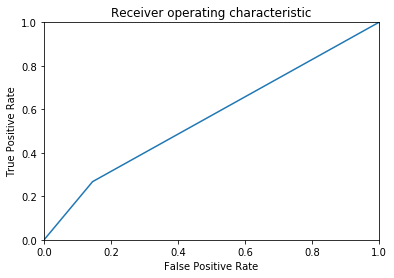

In [70]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, _ = roc_curve(Y_test,Y_pred)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [72]:
# Area under the curve

roc_auc = auc(fpr, tpr)

print('Area Under the curve in percentage is',roc_auc*100)


Area Under the curve in percentage is 56.12910236905021


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [80]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [81]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, Y_ = resample(X_train, Y_train)
    rfcl.fit(X_, Y_)
    Y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(Y_pred, Y_test)
    accuracy.append(acc)

In [82]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7066666666666668
Standard deviation:  0.015055453054181626
